<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/RegressionModels/RegresionAndTimeSeries/Selecci%C3%B3n_de_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seleccion de los basicos hasta el saturado

### Caso 1: velocidad de frenado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/simple_NL.xlsx')
data.head()

,velocidad _km_h,dist_frenado
0,35,16
1,50,26
2,65,41
3,80,62
4,95,88


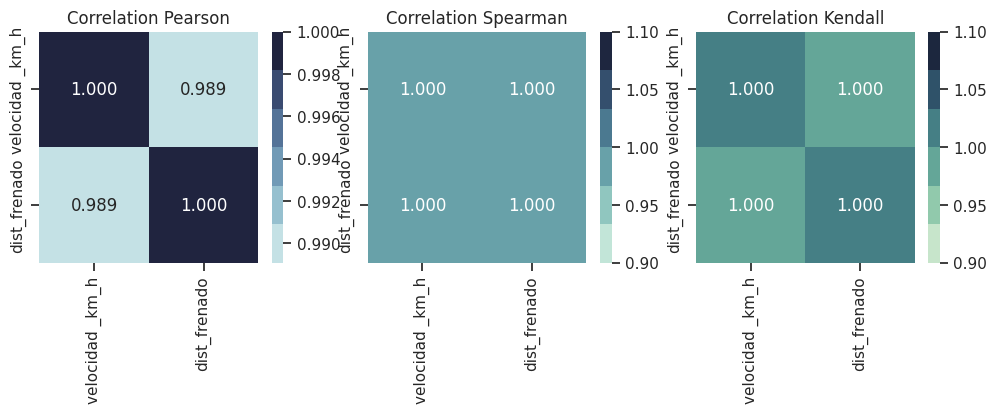

In [ ]:
fig, axes = plt.subplots(1, 3, sharex='col', figsize=(12, 3))
labels = list(data.columns)
matrix = pd.DataFrame(data.corr(method='pearson').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.2), ax=axes[0]).set_title('Correlation Pearson')
matrix = pd.DataFrame(data.corr(method='spearman').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.3), ax=axes[1]).set_title('Correlation Spearman')
matrix = pd.DataFrame(data.corr(method='kendall').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.4), ax=axes[2]).set_title('Correlation Kendall')
plt.show()

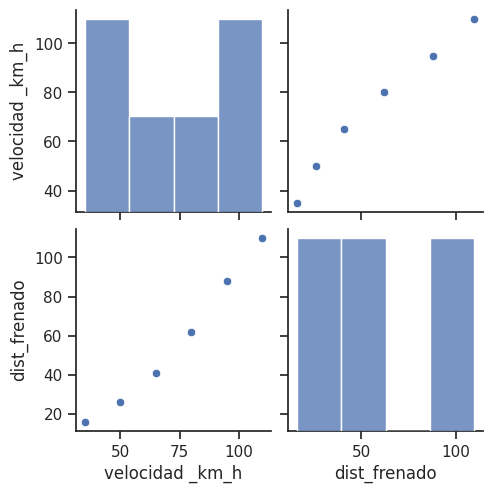

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(data)

In [ ]:
data.columns

Index(['velocidad _km_h', 'dist_frenado'], dtype='object')

In [ ]:
import statsmodels.api as sm

X = pd.DataFrame(
    {
        'beta0' : np.ones(data.shape[0]),
        'beta1' : data['velocidad _km_h'],
    }
)
Y = data['dist_frenado']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           dist_frenado   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           0.000178
Time:                        18:03:35   Log-Likelihood:                -18.074
No. Observations:                   6   AIC:                             40.15
Df Residuals:                       4   BIC:                             39.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0        -36.3238      7.385     -4.919      0.0

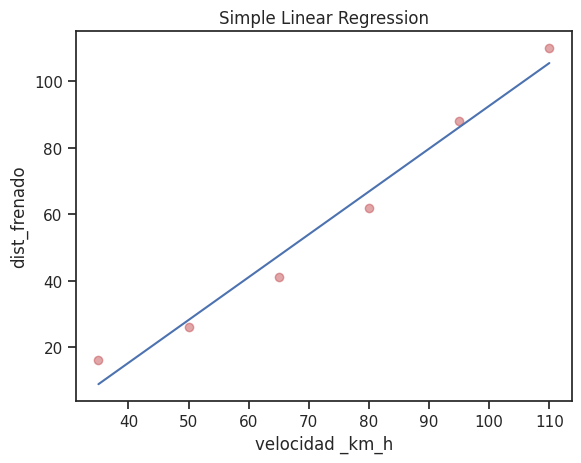

In [ ]:
plt.plot(data['velocidad _km_h'], model.fittedvalues, color='b')
plt.scatter(data['velocidad _km_h'], data['dist_frenado'], color='r', alpha=0.5)
plt.title('Simple Linear Regression')
plt.xlabel('velocidad _km_h')
plt.ylabel('dist_frenado')
plt.show()


## ANOVA de la regresión. (simple)

Tabla ANOVA permite evaluar el modelo en su conjunto

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


X = pd.DataFrame(
    {
        'beta0' : data['dist_frenado'],
        'beta1' : data['velocidad _km_h']
    }
)
model = smf.ols('beta0 ~ beta1', data=X).fit()
print(model.summary())
table = sm.stats.anova_lm(model, typ=2) # Type 2 Anova DataFrame
print(table)

                            OLS Regression Results                            
Dep. Variable:                  beta0   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           0.000178
Time:                        18:03:56   Log-Likelihood:                -18.074
No. Observations:                   6   AIC:                             40.15
Df Residuals:                       4   BIC:                             39.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.3238      7.385     -4.919      0.0

### polinomio

In [ ]:
import statsmodels.api as sm

X = pd.DataFrame(
    {
        'beta0' : np.ones(data.shape[0]),
        'beta1' : data['velocidad _km_h'],
        'beta2' : data['velocidad _km_h']**2
    }
)
Y = data['dist_frenado']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           dist_frenado   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     606.4
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           0.000123
Time:                        18:04:05   Log-Likelihood:                -11.551
No. Observations:                   6   AIC:                             29.10
Df Residuals:                       3   BIC:                             28.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0          1.6444      8.360      0.197      0.8

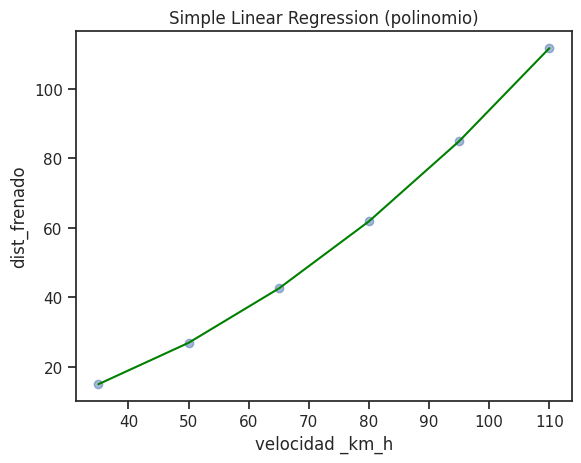

In [ ]:
plt.plot(data['velocidad _km_h'], model.fittedvalues, color='green')
plt.scatter(data['velocidad _km_h'], model.fittedvalues, color='b', alpha=0.5)
plt.title('Simple Linear Regression (polinomio)')
plt.xlabel('velocidad _km_h')
plt.ylabel('dist_frenado')
plt.show()


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


X = pd.DataFrame(
    {
        'beta0' : data['dist_frenado'],
        'beta1' : data['velocidad _km_h']
    }
)
model = smf.ols('beta0 ~ (beta1^2)', data=X).fit()
print(model.summary())
table = sm.stats.anova_lm(model, typ=2) # Type 2 Anova DataFrame
print(table)

                            OLS Regression Results                            
Dep. Variable:                  beta0   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     86.34
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           0.000746
Time:                        18:04:12   Log-Likelihood:                -20.213
No. Observations:                   6   AIC:                             44.43
Df Residuals:                       4   BIC:                             44.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.1424     10.436     -3.272      0.0

# Caso 2: Calamares

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calamares = pd.read_excel('Calamares.xlsx')
calamares.head()

,x1,x2,x3,x4,x5,x6
0,1.31,1.07,0.44,0.75,0.35,1.95
1,1.55,1.49,0.53,0.90,0.47,2.90
2,0.99,0.84,0.34,0.57,0.32,0.72
3,0.99,0.83,0.34,0.54,0.27,0.81
4,1.01,0.90,0.36,0.64,0.30,1.09


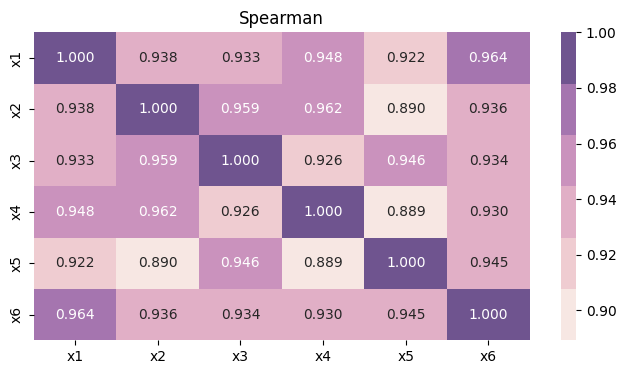

In [ ]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(8, 4))
labels = list(calamares.columns)
matrix = pd.DataFrame(calamares.corr(method='spearman').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(gamma=.5)).set_title('Spearman')
plt.show()

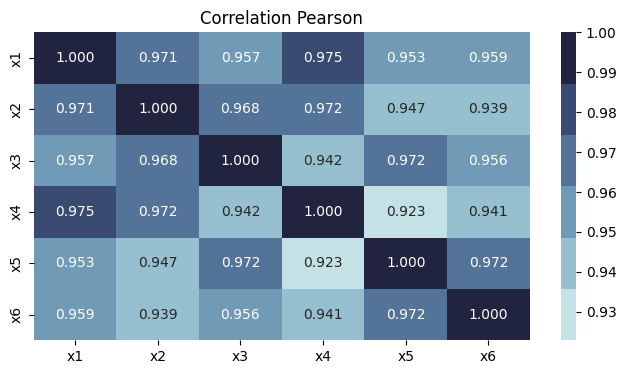

In [ ]:
import seaborn as sns
fig = plt.subplots(1, sharex='col', figsize=(8, 4))
labels = list(calamares.columns)
matrix = pd.DataFrame(calamares.corr(method='pearson').values, index=labels, columns=labels)
sns.heatmap(matrix, annot=True, fmt='.3f', cmap=sns.cubehelix_palette(rot=-.2)).set_title('Correlation Pearson')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(calamares, x='x1', y='x2', z='x3')
fig.show()

In [ ]:
import statsmodels.api as sm

X = calamares[['x1', 'x2', 'x3', 'x4', 'x5']]
Y = calamares['x6']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     x6   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     83.56
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           6.89e-11
Time:                        16:07:58   Log-Likelihood:                -20.039
No. Observations:                  22   AIC:                             52.08
Df Residuals:                      16   BIC:                             58.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4443      0.910     -7.084      0.0